# Análisis Exploratorio de Datos - Enfermedades Crónicas en Colombia

In [145]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


Cargamos el dataset y vemos los 5 primeros datos

In [146]:
df = pd.read_csv('C:/Users/capir/OneDrive/Escritorio/Chronic-deseases-Colombia/data/cleaned_data.csv')
df.head()

,EDAD,PLAN_BENEFICIOS,SEDE,NOMBRE_DIAG,PESO,TALLA,IMC,CARDIOVASCULAR,PULMONAR,NEUROLÓGICO,...,covid1,covid2,covid3,GENERO,IDENTGEN,ORIGSEX,GRUPO ETNICO,NIVELEDUCATIVO,TIPODISCAPAC,OCUPACION
0,49,PACIENTES PARTICULARES,CENTRO DE SALUD TIPO II SAN CRISTÓBAL,HIPERTENSION ESENCIAL (PRIMARIA),76.0,157,30.83,Normal,Normal,Normal,...,Si,Si,No,Femenino,Cisgénero,Heterosexual,Ninguna de las anteriores,14. Sin Informacion,No Presenta,COCINERA
1,49,PACIENTES PARTICULARES,CENTRO DE SALUD TIPO II SAN CRISTÓBAL,HIPERTENSION ESENCIAL (PRIMARIA),76.0,157,30.83,Normal,Normal,Normal,...,Si,Si,No,Femenino,Cisgénero,Heterosexual,Ninguna de las anteriores,14. Sin Informacion,No Presenta,COCINERA
2,68,CAPITAL SALUD EPS SAS - PGP SUBSIDIADO,CENTRO DE SALUD TIPO II SAN CRISTÓBAL,HIPERTENSION ESENCIAL (PRIMARIA),70.0,151,30.70,Normal,Normal,Normal,...,Si,Si,No,Femenino,Cisgénero,Heterosexual,Ninguna de las anteriores,14. Sin Informacion,No Presenta,HOGAR
3,82,CAPITAL SALUD EPS SAS - PGP SUBSIDIADO,CENTRO DE SALUD TIPO II SAN CRISTÓBAL,HIPERTENSION ESENCIAL (PRIMARIA),51.0,142,25.29,Normal,Normal,Normal,...,Si,Si,No,Femenino,Cisgénero,Heterosexual,Ninguna de las anteriores,14. Sin Informacion,Motora-física,AMA DE CASA
4,59,CAPITAL SALUD EPS SAS - PGP SUBSIDIADO,CENTRO DE SALUD TIPO II SAN CRISTÓBAL,HIPERTENSION ESENCIAL (PRIMARIA),84.0,150,37.33,Normal,Normal,Normal,...,Si,Si,No,Femenino,Cisgénero,Heterosexual,Ninguna de las anteriores,14. Sin Informacion,No Presenta,CONDUCTOR


¿Cuántos registros tenemos?

In [147]:
df.shape

(2602, 29)

Exploremos los tipos de datos

In [148]:
df.dtypes

EDAD                       int64
PLAN_BENEFICIOS           object
SEDE                      object
NOMBRE_DIAG               object
PESO                     float64
TALLA                      int64
IMC                       object
CARDIOVASCULAR            object
PULMONAR                  object
NEUROLÓGICO               object
MENTAL                    object
OSTEOMUSCULAR             object
BODEX                     object
RESULTADOIMC              object
ESCALA DISNEA             object
RIESGO CARDIOVASCULAR     object
EPOCCONFIRMADO            object
CLASIFISUI                object
DISCAPACIDAD              object
covid1                    object
covid2                    object
covid3                    object
GENERO                    object
IDENTGEN                  object
ORIGSEX                   object
GRUPO ETNICO              object
NIVELEDUCATIVO            object
TIPODISCAPAC              object
OCUPACION                 object
dtype: object

La variable IMC deberia ser un float, ya que es el índice de masa corporal, corregiremos esto

In [149]:
df.loc[df.IMC == 'No Presenta'].shape[0]

#Como podemos ver, son 8 registros con 'No Presenta', por lo que sustituiremos esto por valores nulos

df.replace('No Presenta', np.nan, inplace=True)

In [150]:
#Revisemos los valores nulos que tenemos ahora
df.isnull().sum()

EDAD                        0
PLAN_BENEFICIOS             0
SEDE                        0
NOMBRE_DIAG                 0
PESO                        0
TALLA                       0
IMC                         8
CARDIOVASCULAR              0
PULMONAR                    0
NEUROLÓGICO                 0
MENTAL                      0
OSTEOMUSCULAR               0
BODEX                       0
RESULTADOIMC                0
ESCALA DISNEA               0
RIESGO CARDIOVASCULAR       0
EPOCCONFIRMADO              0
CLASIFISUI                  0
DISCAPACIDAD                0
covid1                      0
covid2                      0
covid3                      0
GENERO                      0
IDENTGEN                    0
ORIGSEX                     0
GRUPO ETNICO                0
NIVELEDUCATIVO              0
TIPODISCAPAC             1685
OCUPACION                   0
dtype: int64

Tenemos muchos valores nulos en la variable TIPODISCAPAC, por lo que eliminaremos esta columna y eliminaremos los valores nulos de IMC

In [151]:
df = df.drop('TIPODISCAPAC', axis=1)


In [152]:
#Revisemos los valores nulos que tenemos ahora
df.isnull().sum()

EDAD                     0
PLAN_BENEFICIOS          0
SEDE                     0
NOMBRE_DIAG              0
PESO                     0
TALLA                    0
IMC                      8
CARDIOVASCULAR           0
PULMONAR                 0
NEUROLÓGICO              0
MENTAL                   0
OSTEOMUSCULAR            0
BODEX                    0
RESULTADOIMC             0
ESCALA DISNEA            0
RIESGO CARDIOVASCULAR    0
EPOCCONFIRMADO           0
CLASIFISUI               0
DISCAPACIDAD             0
covid1                   0
covid2                   0
covid3                   0
GENERO                   0
IDENTGEN                 0
ORIGSEX                  0
GRUPO ETNICO             0
NIVELEDUCATIVO           0
OCUPACION                0
dtype: int64

In [153]:
df.dropna(inplace=True)

In [154]:
#Revisemos ahora si tenemos valores nulos
df.isnull().sum()

EDAD                     0
PLAN_BENEFICIOS          0
SEDE                     0
NOMBRE_DIAG              0
PESO                     0
TALLA                    0
IMC                      0
CARDIOVASCULAR           0
PULMONAR                 0
NEUROLÓGICO              0
MENTAL                   0
OSTEOMUSCULAR            0
BODEX                    0
RESULTADOIMC             0
ESCALA DISNEA            0
RIESGO CARDIOVASCULAR    0
EPOCCONFIRMADO           0
CLASIFISUI               0
DISCAPACIDAD             0
covid1                   0
covid2                   0
covid3                   0
GENERO                   0
IDENTGEN                 0
ORIGSEX                  0
GRUPO ETNICO             0
NIVELEDUCATIVO           0
OCUPACION                0
dtype: int64

Ahora debemos arreglar la variable IMC ya que no es una variable categórica, es una variable numérica

In [155]:
df['IMC'] = df['IMC'].astype(float)

In [156]:
df = df[df['IMC']<250]

Revisemos cuantas variables hay de cada tipo

In [157]:
df.dtypes.value_counts()

object     24
int64       2
float64     2
Name: count, dtype: int64

In [158]:
df.describe(include='number').T

,count,mean,std,min,25%,50%,75%,max
EDAD,2525.0,67.905347,13.004028,6.0,61.00,69.00,77.00,102.0
PESO,2525.0,65.477980,15.460222,0.0,55.50,65.00,74.00,175.0
TALLA,2525.0,155.067723,15.207876,0.0,150.00,156.00,162.00,300.0
IMC,2525.0,27.596154,12.263694,0.0,23.34,26.62,30.08,249.9


In [159]:
df.describe(include='object').T

,count,unique,top,freq
PLAN_BENEFICIOS,2525,8,CAPITAL SALUD EPS SAS - PGP SUBSIDIADO,1766
SEDE,2525,14,UNIDAD DE SERVICIOS DE SALUD FERIAS,1206
NOMBRE_DIAG,2525,188,HIPERTENSION ESENCIAL (PRIMARIA),1401
CARDIOVASCULAR,2525,3,Normal,2428
PULMONAR,2525,3,Normal,2416
NEUROLÓGICO,2525,3,Normal,2420
MENTAL,2525,3,Normal,2341
OSTEOMUSCULAR,2525,3,Normal,2376
BODEX,2525,1,MODERADA,2525
RESULTADOIMC,2525,10,PESO NORMAL,880


In [160]:
diagnosticos = df['NOMBRE_DIAG'].unique()

diagnosticos.sort()
diagnosticos


array(['(OSTEO)ARTROSIS PRIMARIA GENERALIZADA', 'ALERGIA NO ESPECIFICADA',
       'ANEMIA DE TIPO NO ESPECIFICADO',
       'ANEMIA POR DEFICIENCIA DE HIERRO SIN OTRA ESPECIFICACION',
       'ANEURISMA CEREBRAL, SIN RUPTURA',
       'ANGINA DE PECHO, NO ESPECIFICADA',
       'ANORMALIDADES EN LA PRUEBA DE TOLERANCIA A LA GLUCOSA',
       'APNEA DEL SUENO', 'ARRITMIA CARDIACA, NO ESPECIFICADA',
       'ARTRITIS REUMATOIDE, NO ESPECIFICADA',
       'ARTRITIS REUMATOIDEA SEROPOSITIVA, SIN OTRA ESPECIFICACION',
       'ARTRITIS, NO ESPECIFICADA', 'ARTROSIS, NO ESPECIFICADA',
       'ASMA PREDOMINANTEMENTE ALERGICA', 'ASMA, NO ESPECIFICADO',
       'ASTIGMATISMO', 'ATEROSCLEROSIS DE LAS ARTERIAS DE LOS MIEMBROS',
       'BRONQUIOLITIS AGUDA, NO ESPECIFICADA',
       'BRONQUITIS CRONICA NO ESPECIFICADA', 'BURSITIS DEL HOMBRO',
       'CADERA INESTABLE',
       'CALCULO DE LA VESICULA BILIAR SIN COLECISTITIS',
       'CARCINOMA IN SITU DE LA PIEL DE OTRAS PARTES Y DE LAS NO ESPECIFICADAS DE LA

Text(0, 0.5, 'Índice de masa Corporal por Género')

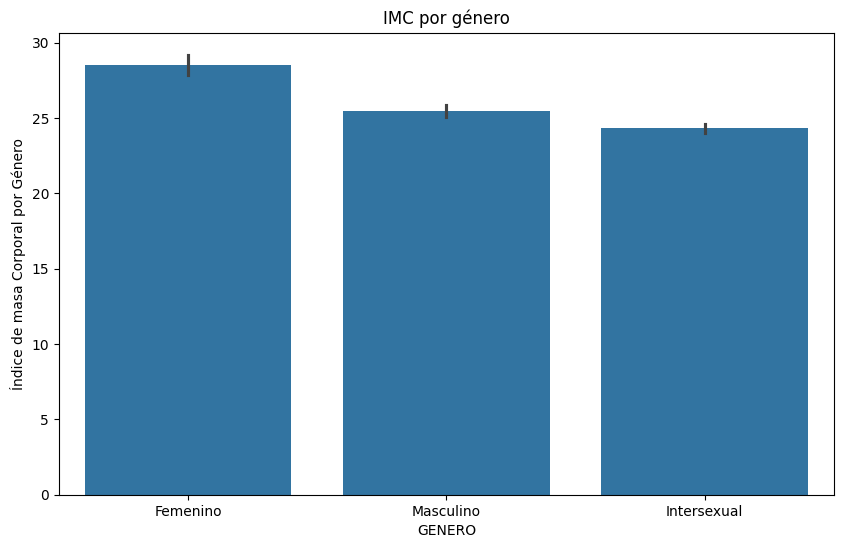

In [161]:
plt.figure(figsize=(10,6))
plt.title("IMC por género")

sns.barplot(x=df.GENERO, y=df['IMC'])

plt.ylabel('Índice de masa Corporal por Género')

Revisemos cuales son las enfermedades más comunes

In [162]:
df['NOMBRE_DIAG'].value_counts()

NOMBRE_DIAG
HIPERTENSION ESENCIAL (PRIMARIA)                                         1401
DIABETES MELLITUS NO INSULINODEPENDIENTE, SIN MENCION DE COMPLICACION     164
HIPOTIROIDISMO, NO ESPECIFICADO                                            99
ENFERMEDAD PULMONAR OBSTRUCTIVA CRONICA, NO ESPECIFICADA                   70
OBESIDAD, NO ESPECIFICADA                                                  64
                                                                         ... 
CADERA INESTABLE                                                            1
OSTEOMIELITIS MULTIFOCAL CRONICA                                            1
TRASTORNO DE LA ELIMINACION TRANSEPIDERMICA, NO ESPECIFICADO                1
SINDROME DE OVARIO POLIQUISTICO                                             1
TINA DE LAS UNAS                                                            1
Name: count, Length: 188, dtype: int64

En este caso vamos a revisar solo las enfermedades relacionadas con Hipertensión, Diabetes, Hipotiroidismo y Obesidad

In [163]:
diabetes_df = df[df['NOMBRE_DIAG'].str.contains(r'diabetes', case=False, na=False)]
hipertension_df = df[df['NOMBRE_DIAG'].str.contains(r'hipertension', case=False, na=False)]
hipotiroidismo_df = df[df['NOMBRE_DIAG'].str.contains(r'hipotiroidismo', case=False, na=False)]
obesidad_df = df[df['NOMBRE_DIAG'].str.contains(r'obesidad', case=False, na=False)]

In [ ]:
df['']

Revisemos cada enfermedad crónica

### Diabetes

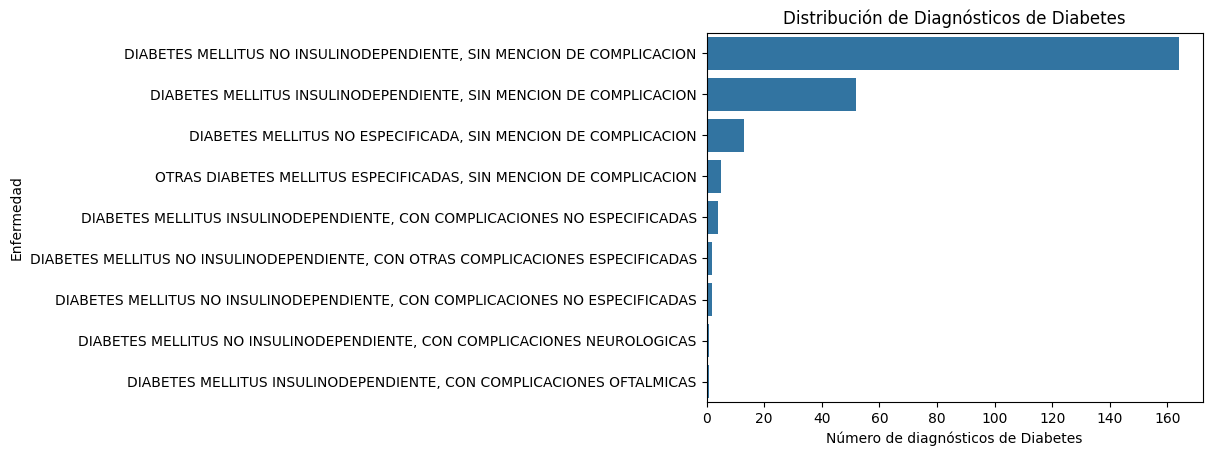

In [164]:
diabetes_counts = diabetes_df['NOMBRE_DIAG'].value_counts()

sns.barplot(x=diabetes_counts.values, y=diabetes_counts.index)
plt.xlabel('Número de diagnósticos de Diabetes')
plt.ylabel('Enfermedad')
plt.title('Distribución de Diagnósticos de Diabetes')
plt.show()

Revisemos la distribución por edad

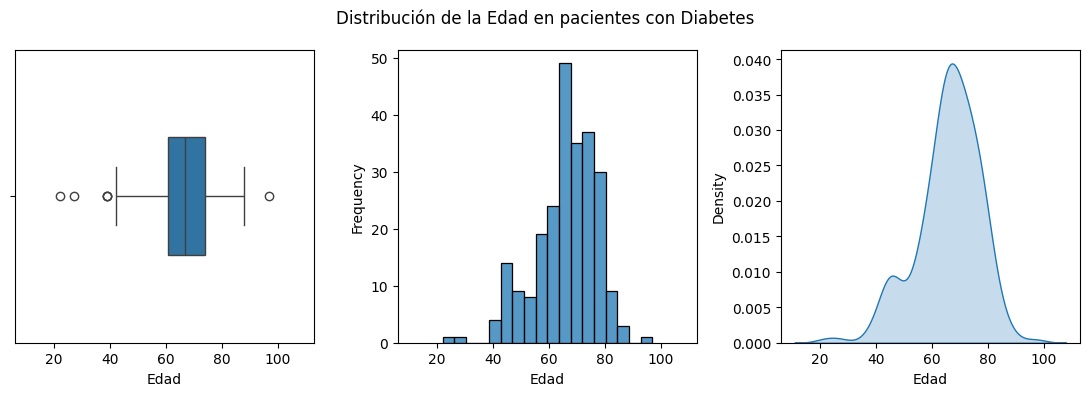

In [190]:
var = 'EDAD'
var_title = 'Edad'
desease = 'Diabetes'

df = diabetes_df

# Ajustes de la figura de Matplotlib
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(11, 4), sharex=True)

# Plotea el boxplot
sns.boxplot(data=df[var], ax=ax[0], orient='h', width=0.4)
ax[0].set_xlabel(var_title)

# Plotea el histograma
sns.histplot(data=df[var], ax=ax[1], kde=False)
ax[1].set_xlabel(var_title)
ax[1].set_ylabel('Frequency')

# Plotea la curva de densidad
sns.kdeplot(data=df[var], ax=ax[2], fill=True)
ax[2].set_xlabel(var_title)
ax[2].set_ylabel('Density')

fig.suptitle('Distribución de la ' + var_title + ' en pacientes con ' + desease)

plt.tight_layout()

### Hipertensión

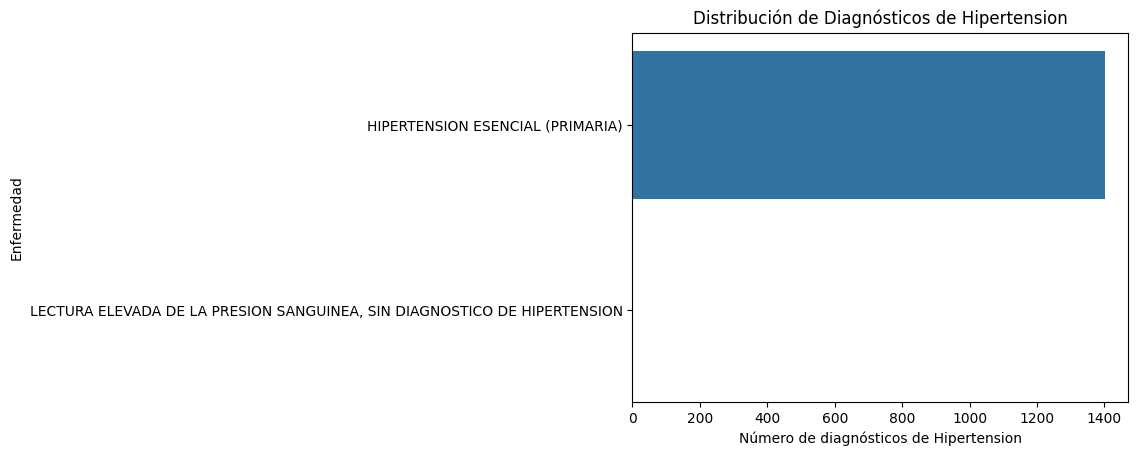

In [167]:
hipertension_counts = hipertension_df['NOMBRE_DIAG'].value_counts()

sns.barplot(x=hipertension_counts.values, y=hipertension_counts.index)
plt.xlabel('Número de diagnósticos de Hipertension')
plt.ylabel('Enfermedad')
plt.title('Distribución de Diagnósticos de Hipertension')
plt.show()

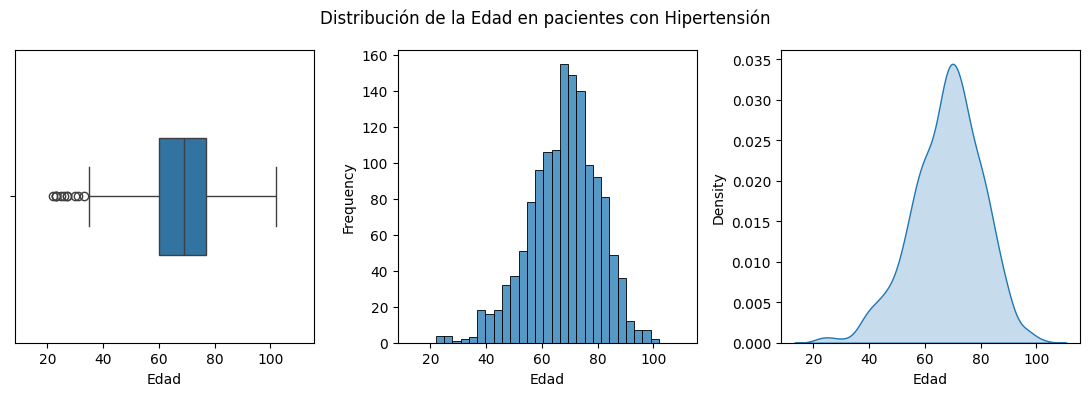

In [189]:
var = 'EDAD'
var_title = 'Edad'
desease = 'Hipertensión'

df = hipertension_df

# Ajustes de la figura de Matplotlib
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(11, 4), sharex=True)

# Plotea el boxplot
sns.boxplot(data=df[var], ax=ax[0], orient='h', width=0.4)
ax[0].set_xlabel(var_title)

# Plotea el histograma
sns.histplot(data=df[var], ax=ax[1], kde=False)
ax[1].set_xlabel(var_title)
ax[1].set_ylabel('Frequency')

# Plotea la curva de densidad
sns.kdeplot(data=df[var], ax=ax[2], fill=True)
ax[2].set_xlabel(var_title)
ax[2].set_ylabel('Density')

fig.suptitle('Distribución de la ' + var_title + ' en pacientes con ' + desease)

plt.tight_layout()

### Hipotiroidismo

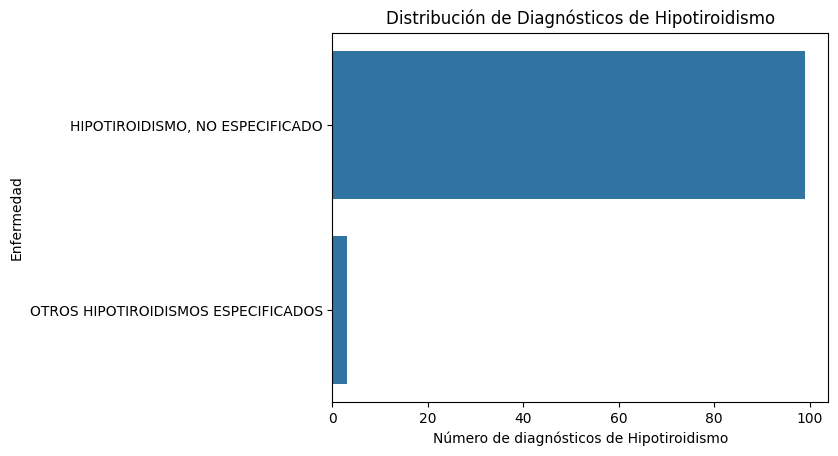

In [170]:
hipotiroidismo_counts = hipotiroidismo_df['NOMBRE_DIAG'].value_counts()

sns.barplot(x=hipotiroidismo_counts.values, y=hipotiroidismo_counts.index)
plt.xlabel('Número de diagnósticos de Hipotiroidismo')
plt.ylabel('Enfermedad')
plt.title('Distribución de Diagnósticos de Hipotiroidismo')
plt.show()

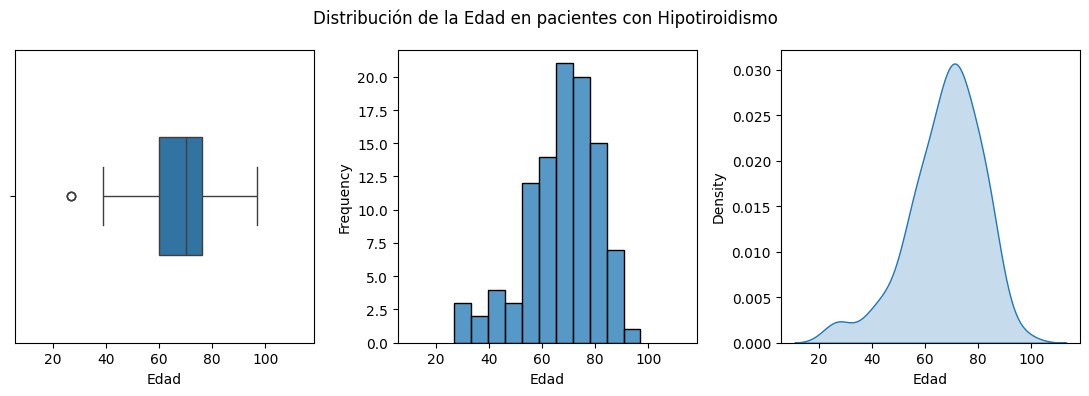

In [191]:
var = 'EDAD'
var_title = 'Edad'
desease = 'Hipotiroidismo'

df = hipotiroidismo_df

# Ajustes de la figura de Matplotlib
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(11, 4), sharex=True)

# Plotea el boxplot
sns.boxplot(data=df[var], ax=ax[0], orient='h', width=0.4)
ax[0].set_xlabel(var_title)

# Plotea el histograma
sns.histplot(data=df[var], ax=ax[1], kde=False)
ax[1].set_xlabel(var_title)
ax[1].set_ylabel('Frequency')

# Plotea la curva de densidad
sns.kdeplot(data=df[var], ax=ax[2], fill=True)
ax[2].set_xlabel(var_title)
ax[2].set_ylabel('Density')

fig.suptitle('Distribución de la ' + var_title + ' en pacientes con ' + desease)

plt.tight_layout()

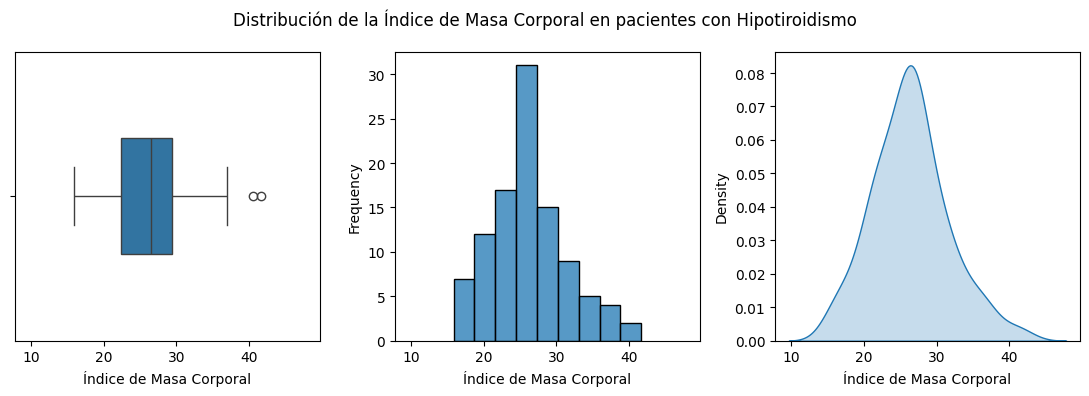

In [ ]:
var = 'IMC'
var_title = 'Índice de Masa Corporal'
desease = 'Hipotiroidismo'

df = hipotiroidismo_df

# Ajustes de la figura de Matplotlib
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(11, 4), sharex=True)

# Plotea el boxplot
sns.boxplot(data=df[var], ax=ax[0], orient='h', width=0.4)
ax[0].set_xlabel(var_title)

# Plotea el histograma
sns.histplot(data=df[var], ax=ax[1], kde=False)
ax[1].set_xlabel(var_title)
ax[1].set_ylabel('Frequency')

# Plotea la curva de densidad
sns.kdeplot(data=df[var], ax=ax[2], fill=True)
ax[2].set_xlabel(var_title)
ax[2].set_ylabel('Density')

fig.suptitle('Distribución de ' + var_title + ' en pacientes con ' + desease)

plt.tight_layout()

### Obesidad

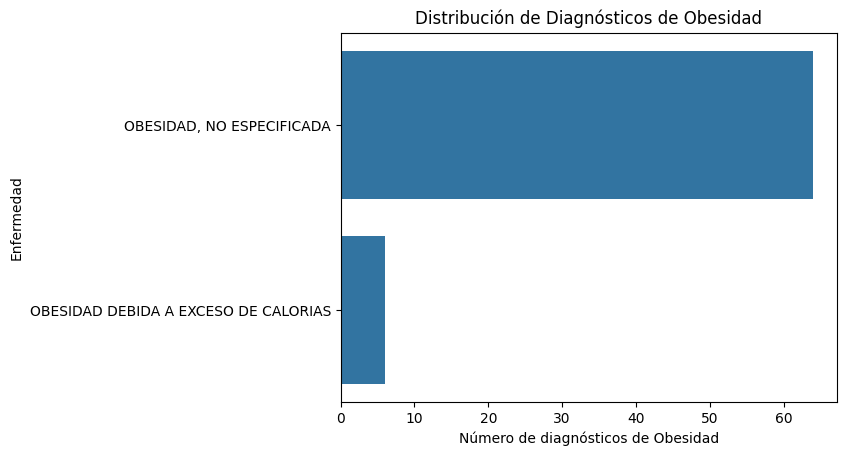

In [171]:
obesidad_counts = obesidad_df['NOMBRE_DIAG'].value_counts()

sns.barplot(x=obesidad_counts.values, y=obesidad_counts.index)
plt.xlabel('Número de diagnósticos de Obesidad')
plt.ylabel('Enfermedad')
plt.title('Distribución de Diagnósticos de Obesidad')
plt.show()

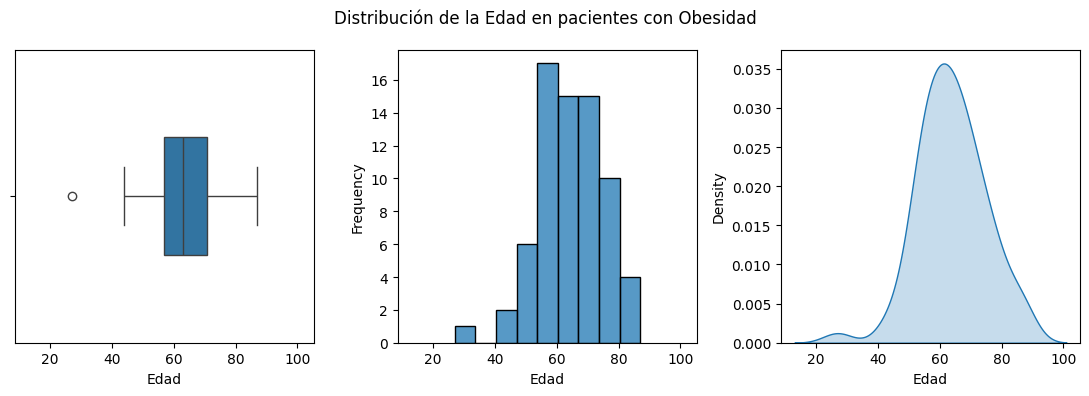

In [ ]:
var = 'EDAD'
var_title = 'Edad'
desease = 'Obesidad'

df = obesidad_df

# Ajustes de la figura de Matplotlib
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(11, 4), sharex=True)

# Plotea el boxplot
sns.boxplot(data=df[var], ax=ax[0], orient='h', width=0.4)
ax[0].set_xlabel(var_title)

# Plotea el histograma
sns.histplot(data=df[var], ax=ax[1], kde=False)
ax[1].set_xlabel(var_title)
ax[1].set_ylabel('Frequency')

# Plotea la curva de densidad
sns.kdeplot(data=df[var], ax=ax[2], fill=True)
ax[2].set_xlabel(var_title)
ax[2].set_ylabel('Density')

fig.suptitle('Distribución de ' + var_title + ' en pacientes con ' + desease)

plt.tight_layout()

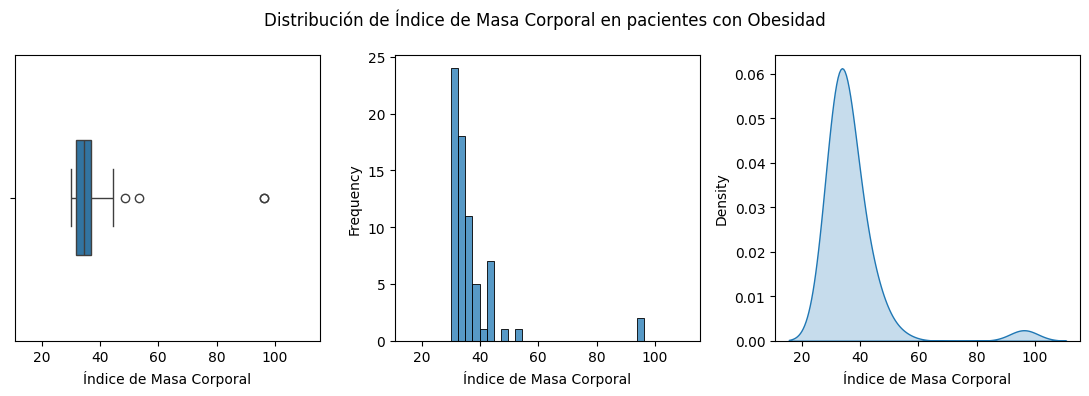

In [195]:
var = 'IMC'
var_title = 'Índice de Masa Corporal'
desease = 'Obesidad'

df = obesidad_df

# Ajustes de la figura de Matplotlib
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(11, 4), sharex=True)

# Plotea el boxplot
sns.boxplot(data=df[var], ax=ax[0], orient='h', width=0.4)
ax[0].set_xlabel(var_title)

# Plotea el histograma
sns.histplot(data=df[var], ax=ax[1], kde=False)
ax[1].set_xlabel(var_title)
ax[1].set_ylabel('Frequency')

# Plotea la curva de densidad
sns.kdeplot(data=df[var], ax=ax[2], fill=True)
ax[2].set_xlabel(var_title)
ax[2].set_ylabel('Density')

fig.suptitle('Distribución de ' + var_title + ' en pacientes con ' + desease)

plt.tight_layout()

## Correlación entre variables y comorbilidades

### Diabetes

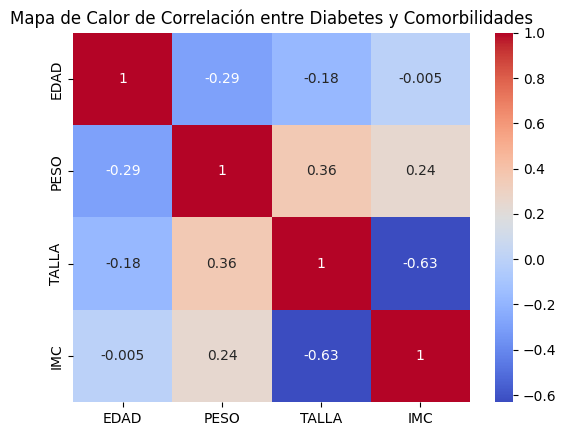

In [199]:

numeric_df = diabetes_df.select_dtypes(include=['number'])
correlation_matrix = numeric_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Mapa de Calor de Correlación entre Diabetes y Comorbilidades')
plt.show()